This notebook shows an example of the data that's tracked and some visualizations that can be made. 

# Setup

In [1]:
from fallGuysStructures import *
from fallGuysFcns import *
import fallGuysVisuals as fgv

import matplotlib.pyplot as plt
from matplotlib.patches import Patch
import os, datetime
import pandas as pd
import numpy as np

# Some setup
plt.rcParams['font.size'] = 14

shows_df, rounds_df, qual_df = getDataFrames(testing=True) # would want to get rid of testing=True for others

finals_df = rounds_df[np.isin(rounds_df['Map'], list_of_finals)] # just finals
non_finals_df = rounds_df[~np.isin(rounds_df['Map'], list_of_finals)] # remove finals

In [2]:
shows_df.tail()

,Show ID,Start Time,Season,Time Taken,Game Mode,Final,Rounds,Username,Party Size,addID,Kudos,Fame,Crowns
396,397,2021-03-19 14:35:41.934000,3,348.613,event_only_thin_ice_1903_to_2203_2021,True,3,Infallible Laughing Penguin,1,20:41:30.547,180,0,0
397,398,2021-03-19 14:42:28.692000,3,418.171,event_only_thin_ice_1903_to_2203_2021,True,3,Infallible Laughing Penguin,1,20:49:26.863,915,0,1
398,399,2021-03-20 11:59:34.358000,3,445.490,event_only_thin_ice_1903_to_2203_2021,True,3,Infallible Laughing Penguin,1,18:06:59.848,915,0,1
399,400,2021-03-20 12:07:41.764000,3,382.923,event_only_thin_ice_1903_to_2203_2021,True,3,Infallible Laughing Penguin,1,18:14:04.687,915,0,1
400,401,2021-03-20 12:14:46.720000,3,356.539,event_only_thin_ice_1903_to_2203_2021,True,3,Infallible Laughing Penguin,1,18:20:43.259,180,0,0


In [3]:
rounds_df.tail(10)

,Show ID,Round Num,Map,Time Spent,Round Length,Qualified,Position,Kudos,Fame,Bonus Tier,Bonus Kudos,Bonus Fame,BadgeId,Participants,Qualification Percent,Actual Num Qual,Team Score
1365,398,2,round_thin_ice_event_only_final,182.939,182.942,True,1,760,0,0.0,35,0,gold,9,0,1.0,NaN
1366,399,0,round_thin_ice_event_only_01,45.326,45.334,True,7,30,0,0.0,35,0,gold,20,75,15.0,NaN
1367,399,1,round_thin_ice_event_only_02,82.275,82.283,True,3,20,0,0.0,35,0,gold,14,66,9.0,NaN
1368,399,2,round_thin_ice_event_only_final,143.222,143.224,True,1,760,0,0.0,35,0,gold,9,0,1.0,NaN
1369,400,0,round_thin_ice_event_only_01,43.121,43.127,True,2,30,0,0.0,35,0,gold,20,75,15.0,NaN
1370,400,1,round_thin_ice_event_only_02,59.305,59.308,True,6,20,0,0.0,35,0,gold,15,66,9.0,NaN
1371,400,2,round_thin_ice_event_only_final,134.553,134.556,True,1,760,0,0.0,35,0,gold,9,0,1.0,NaN
1372,401,0,round_thin_ice_event_only_01,50.750,50.753,True,14,30,0,0.0,35,0,gold,19,75,14.0,NaN
1373,401,1,round_thin_ice_event_only_02,62.488,62.491,True,9,20,0,0.0,35,0,gold,14,66,9.0,NaN
1374,401,2,round_thin_ice_event_only_final,120.351,uncertain,False,3,60,0,3.0,0,0,NaN,9,0,0.0,NaN


# Map Stats

In [4]:
# Get a DataFrame containing info for each different map
maps_df = getMapInfoDataFrame(rounds_df, qual_df)
maps_df.head(10)

,Name,Type,Attempts,Times Qualified,Percent Qualified,Average Position,Average Qual Position,Average Qual Time (s),Fastest Qual Time (s),Average Qual Round Times (s),Total Kudos,Total Fame,Average Kudos,Average Fame,Average Team Score,Bonus: Gold,Bonus: Silver,Bonus: Bronze,Average Tier
round_floor_fall_event_only_01,Hex-A-Gone 1 (Hex-a-gone Trials),Survival,106,95,89.622642,8.783019,7.747368,41.069832,14.903,41.075474,6505,1740,61.367925,16.415094,NaN,95,0,0,0.311321
round_floor_fall_event_only_02,Hex-A-Gone 2 (Hex-a-gone Trials),Survival,95,78,82.105263,5.978947,4.769231,65.088449,48.504,65.094564,4630,1276,48.736842,13.431579,NaN,78,0,0,0.536842
round_floor_fall_event_only_final,Hex-A-Gone Final (Hex-a-gone Trials),Final,75,8,10.666667,4.333333,1.000000,129.215625,118.136,129.217875,10380,783,138.400000,10.440000,NaN,8,0,0,2.680000
round_biggestfan,Big Fans,Race,60,60,100.000000,8.650000,8.650000,84.249717,55.290,177.517917,5135,2616,85.583333,43.600000,NaN,2,41,15,1.283333
round_jump_club_event_only_01,Jump Club 1 (Jump Around),Survival,50,47,94.000000,11.600000,10.680851,36.650574,26.872,36.668128,3145,474,62.900000,9.480000,NaN,47,0,0,0.180000
round_wall_guys,Wall Guys,Race,49,35,71.428571,9.591837,6.657143,78.899971,39.903,98.319486,4175,1712,85.204082,34.938776,NaN,2,10,17,2.122449
round_jump_club_event_only_02,Jump Club 2 (Jump Around),Survival,47,44,93.617021,10.659574,9.977273,33.680409,24.956,33.718886,2480,306,52.765957,6.510638,NaN,44,0,0,0.191489
round_jump_club_event_only_03,Jump Club 3 (Jump Around),Survival,44,37,84.090909,5.568182,4.162162,39.334973,28.399,39.326541,3935,266,89.431818,6.045455,NaN,37,0,0,0.477273
round_tunnel,Roll Out,Survival,39,32,82.051282,16.769231,13.312500,75.603000,22.657,75.612531,2140,1146,54.871795,29.384615,NaN,32,0,0,0.538462
round_gauntlet_04,Knight Fever,Race,38,38,100.000000,10.342105,10.342105,56.404184,42.153,96.682526,3075,1638,80.921053,43.105263,NaN,5,15,16,1.394737


# Round Stats

In [5]:
# Get a DataFrame containing info for each round number 
# (if a final occurs during round 5, that data is in 'final' and not '5')

# Give a switch to say if finals should be separate or not?
rounds_data_df = getRoundInfoDataFrame(rounds_df)
rounds_data_df

,Attempted,Qualified,Percent
Round Num,,,
1,401,380,94.763092
2,380,330,86.842105
3,232,183,78.879310
4,133,80,60.150376
5,4,1,25.000000
final,225,29,12.888889


# Show Stats

In [6]:
# Get a DataFrame containing info for shows by season and total

# add new things to 'getShowStats'
shows_info_df = getShowsInfoDataFrame(shows_df)
shows_info_df

,Total Shows,Total Wins,Total Finals,Average Time (s),Average Rounds,Average Kudos,Average Fame,% Made Finals,% Won,Total Time (hours),Minutes Per Win
2,117,8,47,598.054487,3.931624,360.811966,153.965812,40.170940,6.837607,19.436771,145.775781
3,284,21,180,396.414155,3.221831,273.521127,72.140845,63.380282,7.746479,31.272672,85.289106
total,401,29,227,455.246870,3.428928,298.990025,96.014963,56.608479,7.481297,50.709443,101.418886


# Playlist Stats

In [7]:
# Get a DataFrame containing info for shows by playlist and total
playlist_df = getPlaylistInfoDataFrame(shows_df)
playlist_df

C:\Users\Joseph\BreadTeleportationTechnology\DataScience\Fall Guys\fallGuysFcns.py:411: RuntimeWarning: divide by zero encountered in double_scalars
  'Minutes Per Win': shows_df['Time Taken'].sum() / 60 / shows_df['Crowns'].sum(),


,Total Shows,Total Wins,Total Finals,Average Time (s),Average Rounds,Average Kudos,Average Fame,% Made Finals,% Won,Total Time (hours),Minutes Per Win
main_show,185,16,81,585.468638,3.951351,374.000000,163.637838,43.783784,9.189189,30.086583,106.187939
event_only_hard_mode_2111_to_2711,2,0,0,325.063500,2.500000,132.500000,61.500000,0.000000,0.000000,0.180591,inf
event_season_3_highlight_1512_to_1912,9,0,5,571.339111,4.111111,305.555556,163.666667,55.555556,0.000000,1.428348,inf
event_only_floor_fall_0501_to_0701,37,1,32,340.677270,2.810811,184.054054,103.216216,86.486486,2.702703,3.501405,210.084317
event_fruit_basket_0801_to_1401,1,0,1,310.640000,3.000000,180.000000,106.000000,100.000000,0.000000,0.086289,inf
event_only_survival_2501_to_0102_2021,3,0,0,390.081333,2.666667,171.666667,104.666667,0.000000,0.000000,0.325068,inf
event_only_season_3_variation_0202_to_0702_2021,3,0,1,431.502000,3.333333,208.333333,118.333333,33.333333,0.000000,0.359585,inf
event_fan_favourites_0802_to_1102_2021,7,0,3,492.582571,3.285714,220.714286,121.857143,42.857143,0.000000,0.957799,inf
event_only_jump_club_1202_to_1402_2021,44,0,31,316.750114,3.500000,223.181818,26.954545,70.454545,0.000000,3.871390,inf
event_only_races_any_final_1502_to_1802_2021,1,0,0,593.942000,4.000000,265.000000,0.000000,0.000000,0.000000,0.164984,inf


# Other

In [8]:
# Get a DataFrame containing data for only final maps
maps_df[ maps_df['Type'] == 'Final' ]

,Name,Type,Attempts,Times Qualified,Percent Qualified,Average Position,Average Qual Position,Average Qual Time (s),Fastest Qual Time (s),Average Qual Round Times (s),Total Kudos,Total Fame,Average Kudos,Average Fame,Average Team Score,Bonus: Gold,Bonus: Silver,Bonus: Bronze,Average Tier
round_floor_fall_event_only_final,Hex-A-Gone Final (Hex-a-gone Trials),Final,75,8,10.666667,4.333333,1.0,129.215625,118.136,129.217875,10380,783,138.400000,10.440000,NaN,8,0,0,2.680000
round_jump_showdown_jump_club_event_only_final,Jump Showdown (Jump Around),Final,37,2,5.405405,5.189189,1.0,191.121000,139.286,191.123000,3320,140,89.729730,3.783784,NaN,2,0,0,2.837838
round_floor_fall,Hex-A-Gone,Final,28,2,7.142857,4.035714,1.0,106.807000,92.734,106.818000,3440,946,122.857143,33.785714,NaN,2,0,0,2.785714
round_jump_showdown,Jump Showdown,Final,21,3,14.285714,5.428571,1.0,183.094333,142.522,183.097333,3625,1094,172.619048,52.095238,NaN,3,0,0,2.571429
round_fall_mountain_hub_complete,Fall Mountain,Final,21,7,33.333333,3.857143,1.0,38.216286,35.305,35.566286,6605,1885,314.523810,89.761905,NaN,7,0,0,2.000000
round_thin_ice_event_only_final,Thin Ice (Thin Ice Trials),Final,17,3,17.647059,4.235294,1.0,153.571333,134.553,153.574000,3225,0,189.705882,0.000000,NaN,3,0,0,2.470588
round_thin_ice,Thin Ice,Final,14,3,21.428571,4.071429,1.0,131.022333,105.602,131.025000,3175,809,226.785714,57.785714,NaN,3,0,0,2.357143
round_tunnel_final,Roll Off,Final,9,0,0.000000,4.444444,NaN,NaN,NaN,NaN,630,270,70.000000,30.000000,NaN,0,0,0,3.000000
round_royal_rumble,Royal Fumble,Final,3,1,33.333333,3.333333,1.0,92.772000,92.772,90.400000,905,233,301.666667,77.666667,NaN,1,0,0,2.000000


In [9]:
# Get a Series containing number of times eliminated by map
rounds_df[rounds_df['Qualified'] == False]['Map'].value_counts()

round_floor_fall_event_only_final                 67
round_jump_showdown_jump_club_event_only_final    35
round_floor_fall                                  26
round_jump_showdown                               18
round_floor_fall_event_only_02                    17
round_wall_guys                                   14
round_thin_ice_event_only_final                   14
round_fall_mountain_hub_complete                  14
round_floor_fall_event_only_01                    11
round_thin_ice                                    11
round_fall_ball_60_players                        10
round_tunnel_final                                 9
round_dodge_fall                                   8
round_lava                                         8
round_jump_club_event_only_03                      7
round_hoops                                        7
round_tunnel                                       7
round_hoops_blockade_solo                          7
round_tail_tag                                

In [10]:
# Get a DataFrame containing the finals that were won
finals_df[finals_df['Qualified']]

,Show ID,Round Num,Map,Time Spent,Round Length,Qualified,Position,Kudos,Fame,Bonus Tier,Bonus Kudos,Bonus Fame,BadgeId,Participants,Qualification Percent,Actual Num Qual,Team Score
38,11,4,round_jump_showdown,181.522,181.524,True,1,770,210,0.0,35,18,gold,10,0,1.0,NaN
207,54,4,round_fall_mountain_hub_complete,39.191,36.421,True,1,770,210,0.0,35,18,gold,5,0,1.0,NaN
215,56,4,round_floor_fall,120.880,120.9,True,1,770,210,0.0,35,18,gold,12,0,1.0,NaN
293,75,4,round_jump_showdown,142.522,142.524,True,1,770,210,0.0,35,18,gold,8,0,1.0,NaN
298,76,4,round_fall_mountain_hub_complete,38.975,36.203,True,1,770,210,0.0,35,18,gold,9,0,1.0,NaN
317,82,4,round_fall_mountain_hub_complete,38.835,36.86,True,1,770,210,0.0,35,18,gold,9,0,1.0,NaN
356,91,4,round_fall_mountain_hub_complete,38.281,35.516,True,1,770,210,0.0,35,18,gold,10,0,1.0,NaN
416,106,4,round_fall_mountain_hub_complete,35.305,32.538,True,1,770,210,0.0,35,18,gold,10,0,1.0,NaN
503,128,4,round_jump_showdown,225.239,225.244,True,1,770,175,0.0,35,18,gold,13,0,1.0,NaN
534,135,4,round_fall_mountain_hub_complete,39.421,36.672,True,1,770,175,0.0,35,18,gold,12,0,1.0,NaN


# Visuals

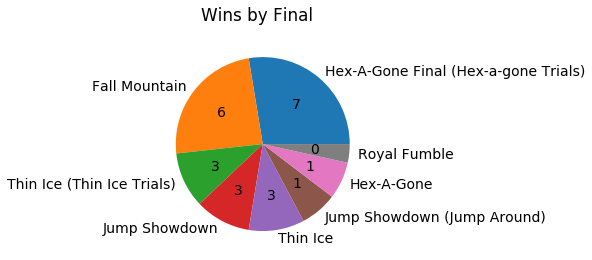

In [11]:
# Get a pie chart for final map wins
fgv.finalMapWinsPie(finals_df);

gold           1
silver        10
bronze        18
none           1
eliminated     8
Name: BadgeId, dtype: int64

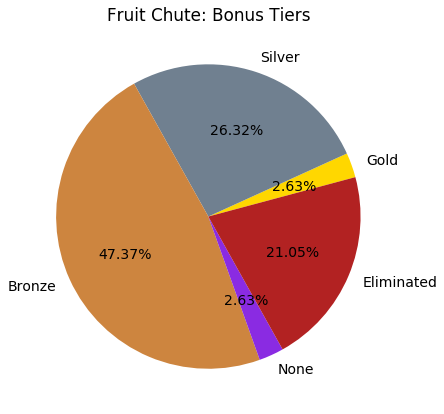

In [12]:
# Get a pie chart for a certain map - bonus tier
# can take either map names or their variables (round_dodge_fall)
fgv.mapBonusTiersPie(rounds_df, 'round_dodge_fall', eliminated=True, percent=True)

main_show                                  15
event_only_floor_fall_2302_to_2502_2021     5
event_only_thin_ice_1903_to_2203_2021       3
event_only_jump_club_0603_to_0803_2021      2
event_only_floor_fall_1203_to_1403_2021     2
event_only_floor_fall_0501_to_0701          1
Name: Game Mode, dtype: int64

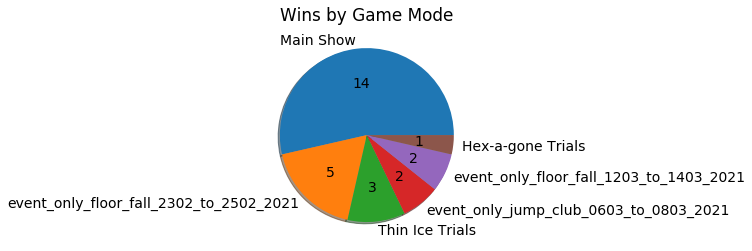

In [13]:
# Get a pie chart for wins by show
fgv.showWinsPie(shows_df)

In [14]:
# Get a Series containing times played each show
# extra for now
shows_df['Game Mode'].value_counts()

main_show                                          185
event_only_jump_club_1202_to_1402_2021              44
event_only_floor_fall_0501_to_0701                  37
event_only_floor_fall_1203_to_1403_2021             37
event_only_floor_fall_2302_to_2502_2021             32
event_only_thin_ice_1903_to_2203_2021               21
event_only_survival_1902_to_2202_2021               12
event_season_3_highlight_1512_to_1912                9
event_fan_favourites_0802_to_1102_2021               7
event_only_jump_club_0603_to_0803_2021               6
event_only_survival_2501_to_0102_2021                3
event_only_season_3_variation_0202_to_0702_2021      3
event_only_hard_mode_2111_to_2711                    2
event_fruit_basket_0801_to_1401                      1
event_only_survival_1503_to_1803_2021                1
event_only_races_any_final_1502_to_1802_2021         1
Name: Game Mode, dtype: int64

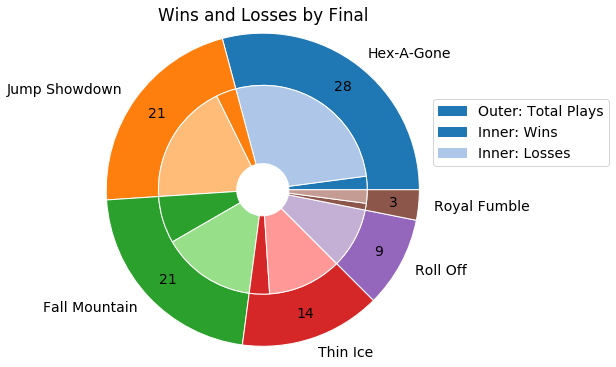

In [15]:
# Get a layered pie chart for plays vs wins and losses by final map
fgv.finalsWinsLossesPie(finals_df, regular=True, total_num=True); 

,overall,pos,neg
round_biggestfan,60,60,0
round_gauntlet_04,38,38,0
round_see_saw,37,37,0
round_gauntlet_01,32,30,2
round_chompchomp,25,24,1
round_gauntlet_02,25,24,1
round_door_dash,23,22,1
round_gauntlet_05,23,23,0
round_gauntlet_03,21,21,0


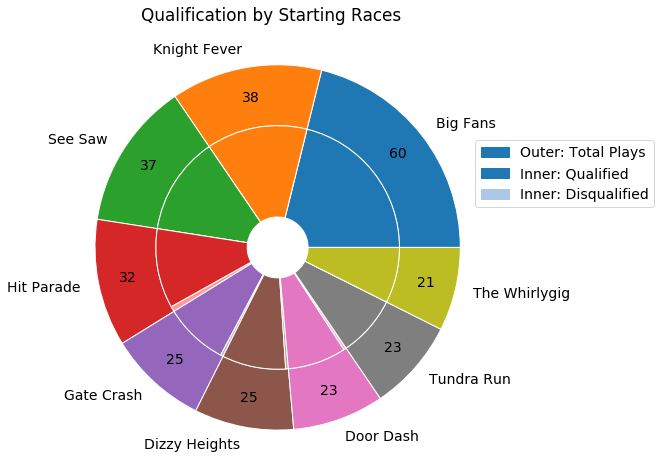

In [16]:
# Get a layered pie chart for qualfied vs non_qualified for starting races
fgv.startingRacesPie(rounds_df, total_num=True, pie_size=(7,7))

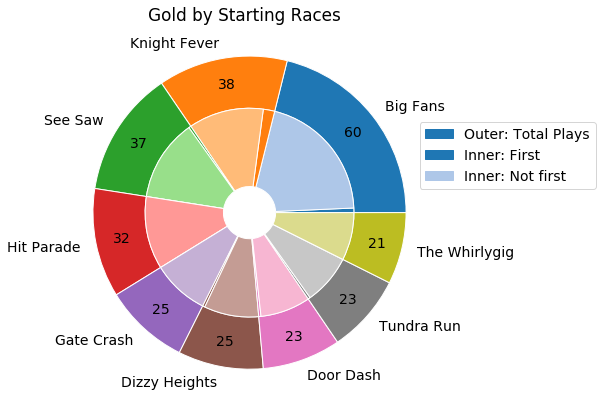

In [17]:
# Get a layered pie chart for gold vs non-gold for starting races
fgv.startingRacesPie(rounds_df, inner='gold', title='Gold by Starting Races', outer_title='Total Plays', 
                 inner_pos_title='First', inner_neg_title='Not first', total_num=True);

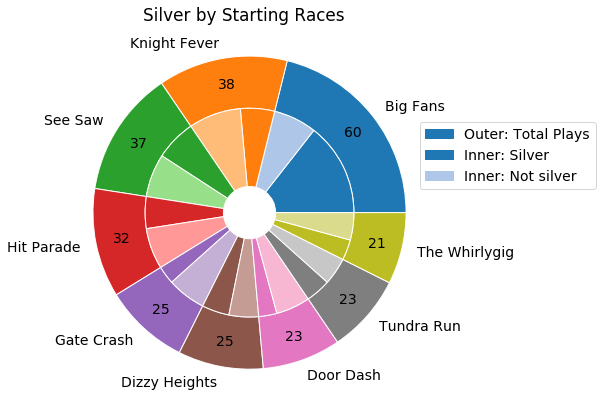

In [18]:
# Get a layered pie chart for silver vs non-silver for starting races
fgv.startingRacesPie(rounds_df, inner='silver', title='Silver by Starting Races', outer_title='Total Plays', 
                 inner_pos_title='Silver', inner_neg_title='Not silver', total_num=True);

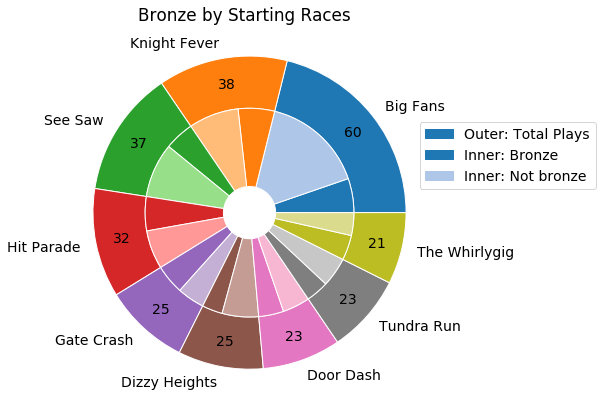

In [19]:
# Get a layered pie chart for bronze vs non-bronze for starting races
fgv.startingRacesPie(rounds_df, inner='bronze', title='Bronze by Starting Races', outer_title='Total Plays', 
                 inner_pos_title='Bronze', inner_neg_title='Not bronze', total_num=True);

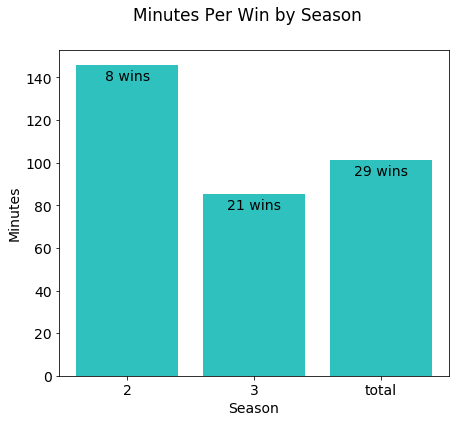

In [20]:
# Get a bar graph for average time per win by season and total
fgv.minutesPerWinBar(shows_info_df)

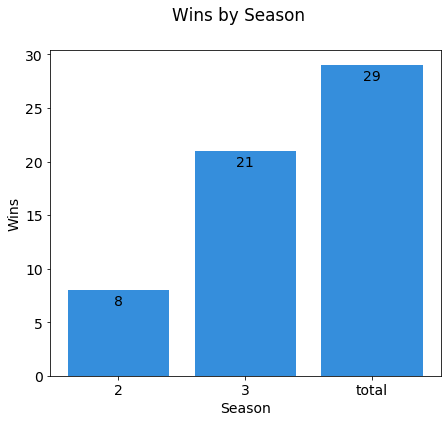

In [21]:
# Get a bar chart for wins by season
fgv.winsBySeasonBar(shows_info_df)

In [22]:
# Get win streaks (returns row ids for shows_df)
getStreaks(shows_df)

[[74, 75], [397, 398, 399]]

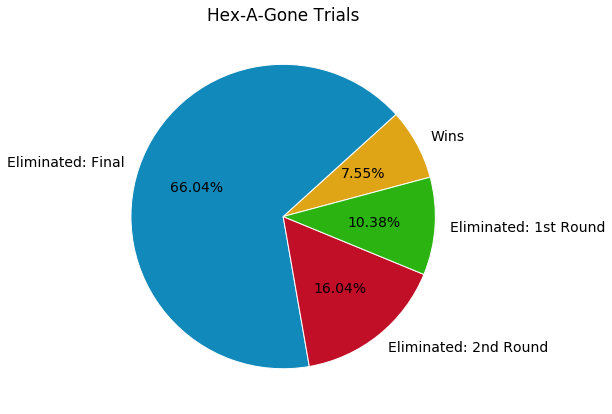

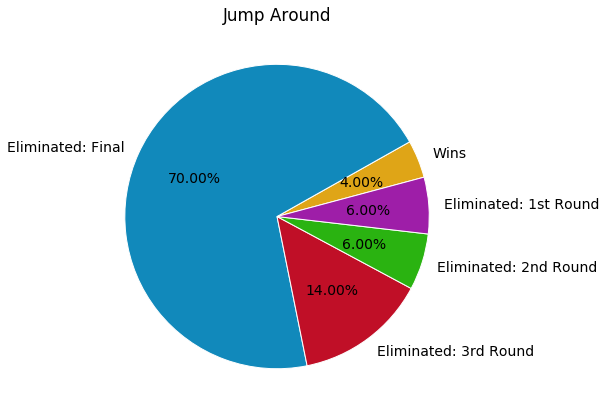

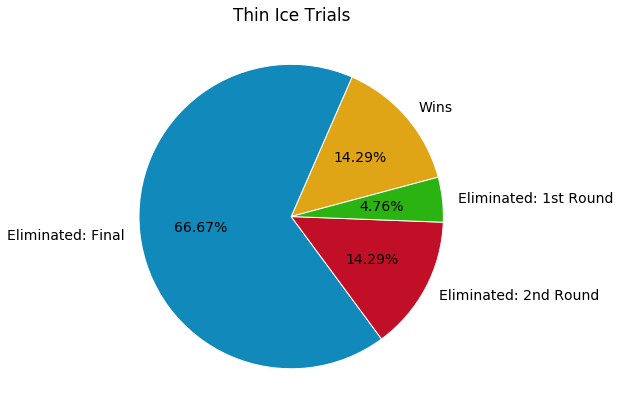

In [25]:
# Get a pie chart for success in playlists that are of the 'same' final
special_shows = ['event_only_floor_fall', 'event_only_jump_club', 'event_only_thin_ice']

for special_show in special_shows:
    fgv.specialShowsPie(special_show, shows_df, explode=False, percent=True)